In [245]:
import numpy as np
import os
import re
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

### KP vs phip for Hill

In [295]:
target_directory = '/nfs/arupclab001/npradeep96/PhaseField/VARY_PHI_P_kl'
phi_p_0_range = [0.04, 0.06, 0.08, 0.1, 0.12, 0.14]
kpl_range = [0.0, 0.001, 0.005, 0.01, 0.05]

name_pattern = ".*phi_p0_{phi_p}_k_p_lncRNA_{kp}_.*_M_rna_0.01$"

stats_file = 'stats.txt'

area = 3.14*15**2

phis, kps = np.meshgrid(phi_p_0_range, kpl_range)
N_m_total = np.zeros(phis.shape)

for i in range(len(kpl_range)):

    for j in range(len(phi_p_0_range)):
        
        pattern = name_pattern.format(phi_p=phi_p_0_range[j], kp=kpl_range[i])
        
        for root, dirs, files in os.walk(target_directory):

            regex = re.compile(pattern)
            match = re.search(regex, root)

            if match != None:
                stats_file_name = root + '/' + stats_file 
                df_stats = pd.read_csv(stats_file_name, '\t')
                N_m_total[i,j] = df_stats['phi_m_avg'].iloc[-1]*area

In [296]:
print(N_m_total)

[[2.0793708  3.040776   3.9106188  4.6525851  5.2956414  5.8519395 ]
 [2.1890196  3.15077805 3.99123045 4.71341475 5.34022155 5.8820364 ]
 [2.58896925 3.40596585 4.11684615 4.7432997  5.2928154  5.7701268 ]
 [2.78707185 3.4383942  4.031289   4.56844095 5.0479425  5.4690165 ]
 [2.59391475 2.93204565 3.25986165 3.5764443  3.87663615 4.1526657 ]]


<IPython.core.display.Javascript object>


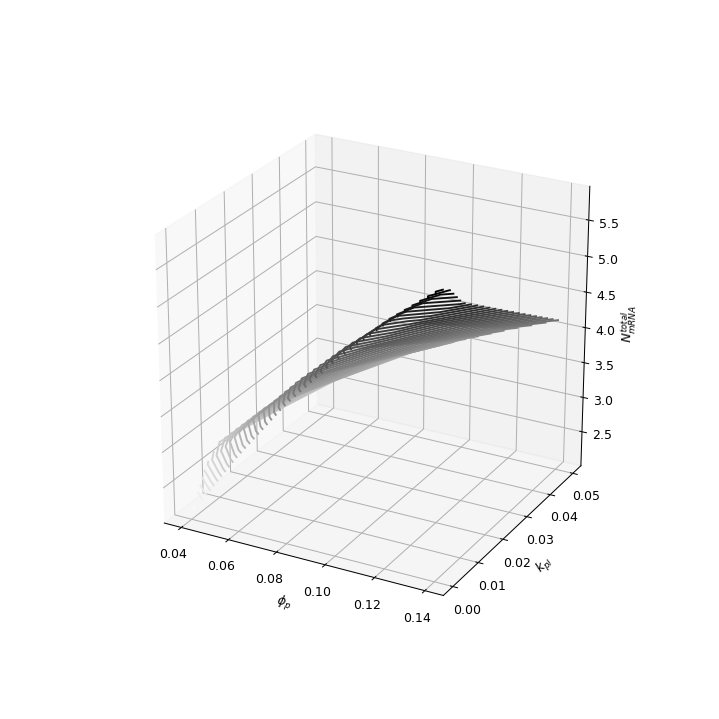

In [297]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.contour3D(phis, kps, N_m_total, 50, cmap='binary')
ax.set_xlabel('$\phi_p$')
ax.set_ylabel('$k_{pl}$')
ax.set_zlabel('$N^{total}_{mRNA}$');

<IPython.core.display.Javascript object>


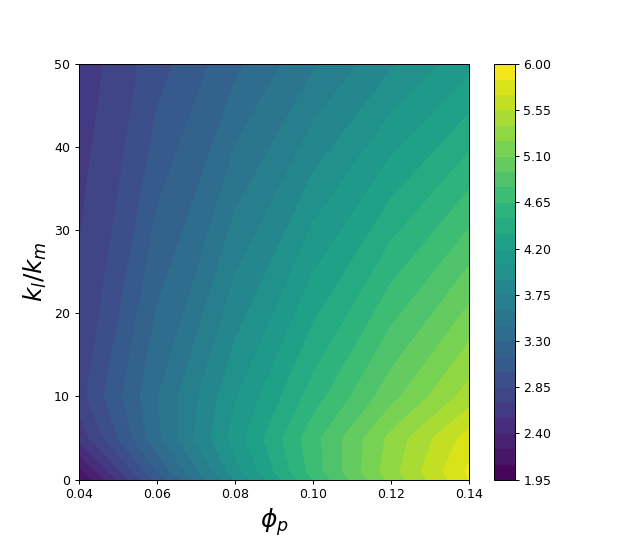

In [310]:
%matplotlib notebook
fig = plt.figure(figsize=(7,6))
ax = plt.axes()

im = ax.contourf(phis, kps/0.001, N_m_total, 25)
ax.set_xlabel('$\phi_p$', fontsize=20)
ax.set_ylabel('$k_{l}/k_{m}$', fontsize=20)
plt.colorbar(im)
# ax.set_zlabel('$N^{total}_{mRNA}$');

<IPython.core.display.Javascript object>


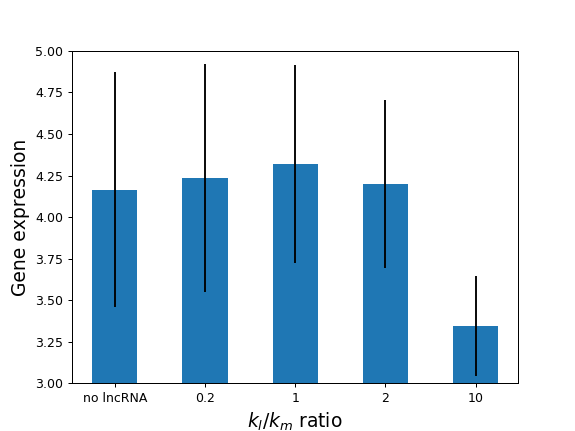

In [306]:
# Assume a gaussian distribution for phi_p centered at phi_p = 0.1, variance 0.02

sigma = 0.02
mu = 0.09

prob = lambda x: 1/((2*np.pi)**0.5*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

phi_p_0_range = np.array([0.04, 0.06, 0.08, 0.1, 0.12, 0.14])
kpl_range = np.array([0.0, 0.001, 0.005, 0.01, 0.05])

avg = np.zeros(len(kpl_range))
std = np.zeros(len(kpl_range))
min_val = np.zeros(len(kpl_range))
max_val = np.zeros(len(kpl_range))

fig, axs = plt.subplots()

for i in range(len(kpl_range)):
    avg[i] = np.trapz(N_m_total[i,:]*prob(phi_p_0_range), phi_p_0_range)
    std[i] = np.sqrt(np.trapz((N_m_total[i,:]-avg[i])**2*prob(phi_p_0_range), phi_p_0_range))
    min_val[i] = np.min(N_m_total[i,:])
    max_val[i] = np.max(N_m_total[i,:])
    

labels = ["", "no lncRNA", "0.2", "1", "2", "10"]
X = np.arange(len(labels)-1)

axs.bar(X, avg,  yerr= std, width=0.5)
axs.set_ylim([3,5])
axs.set_xticklabels(labels)
axs.set_xlabel('$k_l/k_m$ ratio', fontsize = 15)
axs.set_ylabel('Gene expression', fontsize = 15)
plt.savefig("../LNCRNA_ACTIVITY/20211215 - Plots for joint meeting/noise_gene_expression.svg", format='svg', dpi=1200)
plt.show()

### lp vs KP for hill

In [231]:
target_directory = '/nfs/arupclab001/npradeep96/PhaseField/VARY_L_P_kl_HILL'
lp_range = [0.0, 2.0, 4.0, 6.0, 10.0]
kpl_range = [0.0, 0.0005, 0.001, 0.005, 0.01]
kp_spread = 4.0

name_pattern = ".*k_p_lncRNA_{kp}_L_P_{lp}.*_M_rna_0.01$"

stats_file = 'stats.txt'

area = 3.14*15**2

lps, kps = np.meshgrid(lp_range, kpl_range)
N_m_total = np.zeros(lps.shape)

for i in range(len(kpl_range)):

    for j in range(len(lp_range)):
        
        pattern = name_pattern.format(lp=lp_range[j], kp=kpl_range[i])
        
        for root, dirs, files in os.walk(target_directory):

            regex = re.compile(pattern)
            match = re.search(regex, root)

            if match != None:
                stats_file_name = root + '/' + stats_file 
                df_stats = pd.read_csv(stats_file_name, '\t')
                N_m_total[i,j] = df_stats['phi_m_avg'].iloc[-1]*area

<IPython.core.display.Javascript object>


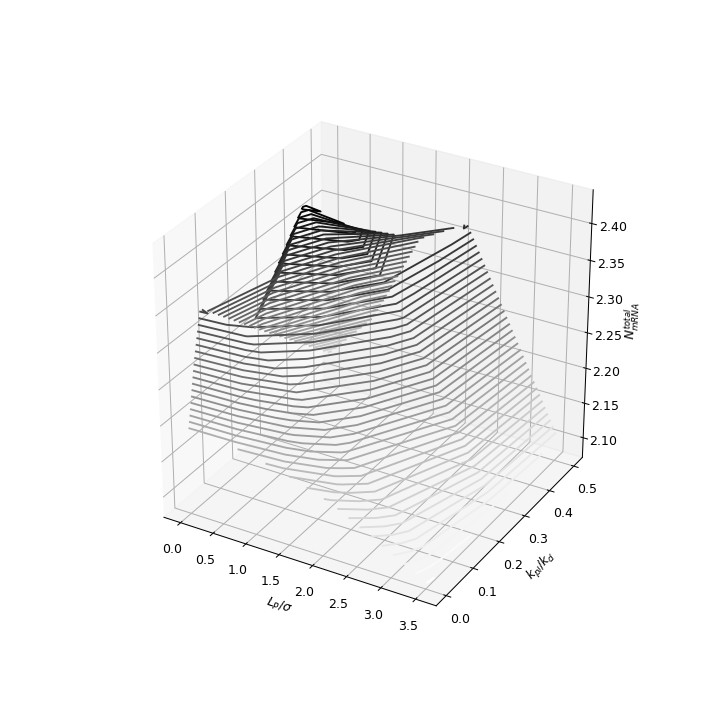

In [232]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.contour3D(lps/(kp_spread/2**0.5), kps/(0.02), N_m_total, 50, cmap='binary')
ax.set_xlabel('$L_P/\sigma$')
ax.set_ylabel('$k_{pl}/k_d$')
ax.set_zlabel('$N^{total}_{mRNA}$');

<IPython.core.display.Javascript object>


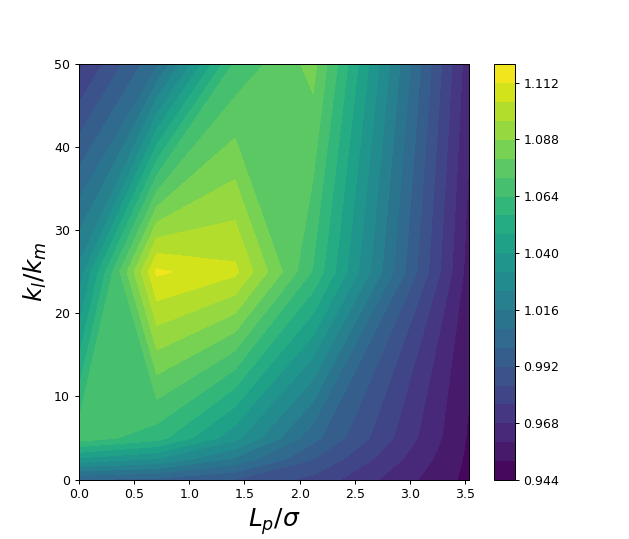

In [237]:
%matplotlib notebook
fig = plt.figure(figsize=(7,6))
ax = plt.axes()

im = ax.contourf(lps/(kp_spread/2**0.5), kps/(0.0002), N_m_total/N_m_total[0,0], 25)
ax.set_xlabel('$L_p/\sigma$', fontsize=20)
ax.set_ylabel('$k_{l}/k_m$', fontsize=20)
plt.colorbar(im)
plt.savefig("../LNCRNA_ACTIVITY/20211215 - Plots for joint meeting/steady_state_mrna_l_kp.svg", format='svg', dpi=1200)
# ax.set_zlabel('$N^{total}_{mRNA}$');

### kp1 vs kp2 for linear

In [225]:
target_directory = '/nfs/arupclab001/npradeep96/PhaseField/ACTIVE_MRNA_LNCRNA'
kpm_range = [0.001, 0.005, 0.01, 0.05]
kpl_range = [0.0, 0.001, 0.005, 0.01, 0.05]

name_pattern = ".*k_p_lncRNA_{kpl}.*k_p_{kpm}.*_M_rna_0.01$"

stats_file = 'stats.txt'

area = 3.14*15**2

kpls, kpms = np.meshgrid(kpl_range, kpm_range)
N_m_total = np.zeros(kpms.shape)

for i in range(len(kpm_range)):

    for j in range(len(kpl_range)):
        
        pattern = name_pattern.format(kpm=kpm_range[i], kpl=kpl_range[j])
        
        for root, dirs, files in os.walk(target_directory):

            regex = re.compile(pattern)
            match = re.search(regex, root)

            if match != None:
                stats_file_name = root + '/' + stats_file 
                df_stats = pd.read_csv(stats_file_name, '\t')
                N_m_total[j,i] = df_stats['phi_m_avg'].iloc[-1]*area

IndexError: index 4 is out of bounds for axis 0 with size 4

<IPython.core.display.Javascript object>


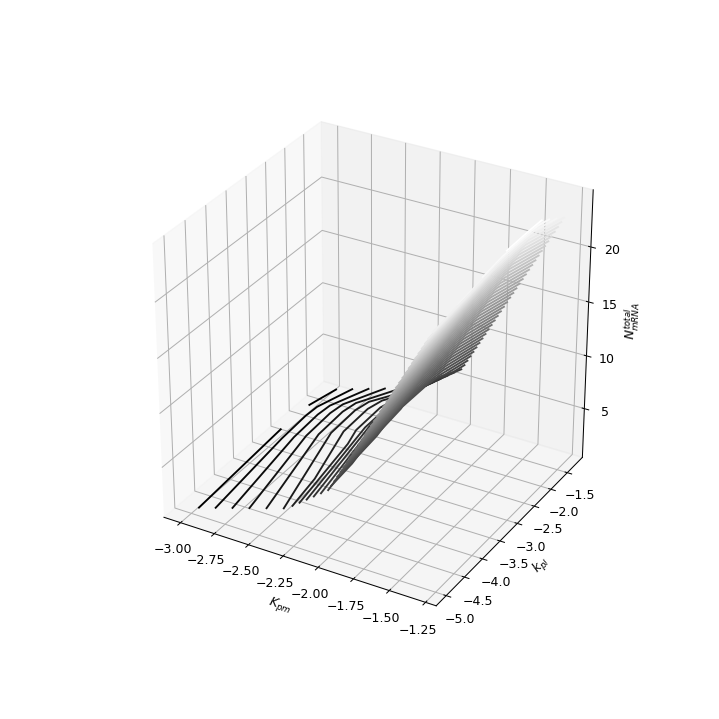

In [214]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.contour3D(np.log10(1e-5 + kpls), np.log10(kpms), N_m_total, 50, cmap='binary_r')
ax.set_xlabel('$K_{pl}$')
ax.set_ylabel('$k_{pm}$')
ax.set_zlabel('$N^{total}_{mRNA}$');

<IPython.core.display.Javascript object>


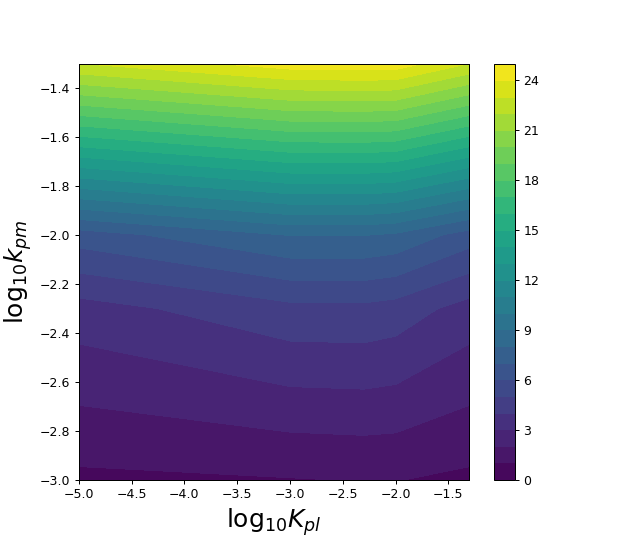

In [224]:
%matplotlib notebook
fig = plt.figure(figsize=(7,6))
ax = plt.axes()

im = ax.contourf(np.log10(1e-5 + kpls), np.log10(kpms),  N_m_total, 25)
ax.set_xlabel('$\log_{10} K_{pl}$', fontsize=20)
ax.set_ylabel('$\log_{10} k_{pm}$', fontsize=20)
plt.colorbar(im)
# ax.set_zlabel('$N^{total}_{mRNA}$');

In [221]:
N_m_total.transpose()

array([[ 0.78725295,  0.95879115,  1.0418049 ,  1.0336095 ,  0.78725295],
       [ 3.5764443 ,  4.71341475,  4.7432997 ,  4.56844095,  3.5764443 ],
       [ 6.51640275,  8.051274  ,  8.0392635 ,  7.837911  ,  6.51640275],
       [22.9661955 , 24.507072  , 24.591852  , 24.550875  , 22.9661955 ]])

In [197]:
target_directory = '/nfs/arupclab001/npradeep96/PhaseField/VARY_PHI_P_kl'
phi_p_0_range = [0.06, 0.08, 0.1, 0.12, 0.14]
kpl_range = [0.0, 0.001, 0.005, 0.01, 0.05]

name_pattern = ".*phi_p0_{phi_p}_k_p_lncRNA_{kp}.*_M_rna_0.01$"

stats_file = 'stats.txt'

area = 3.14*15**2

phis, kps = np.meshgrid(phi_p_0_range, kpl_range)
N_m_total = np.zeros(phis.shape)

for i in range(len(kpl_range)):

    for j in range(len(phi_p_0_range)):
        
        pattern = name_pattern.format(phi_p=phi_p_0_range[j], kp=kpl_range[i])
        
        for root, dirs, files in os.walk(target_directory):

            regex = re.compile(pattern)
            match = re.search(regex, root)

            if match != None:
                stats_file_name = root + '/' + stats_file 
                df_stats = pd.read_csv(stats_file_name, '\t')
                N_m_total[i,j] = df_stats['phi_m_avg'].iloc[-1]*area

<IPython.core.display.Javascript object>


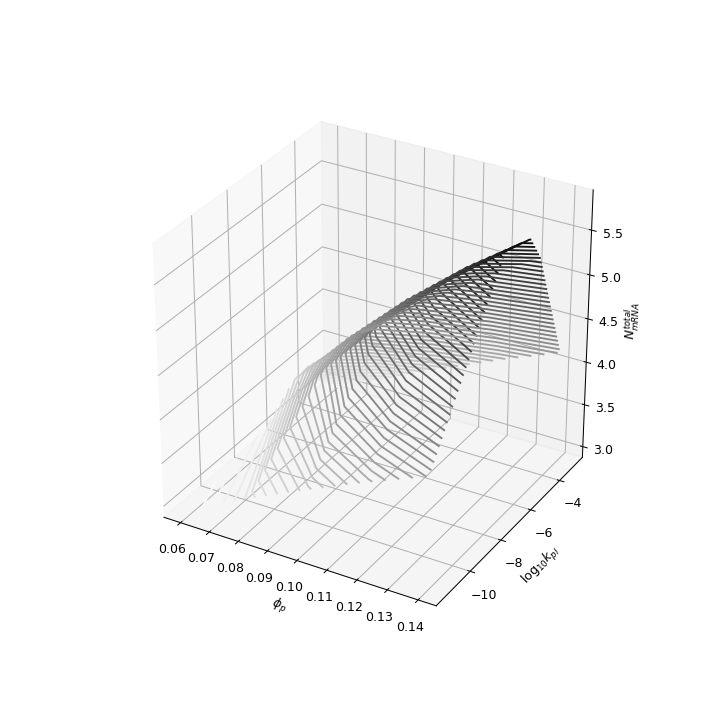

In [198]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.contour3D(phis, np.log(kps+1e-5), N_m_total, 50, cmap='binary')
ax.set_xlabel('$\phi_p$')
ax.set_ylabel('$\log_{10} k_{pl}$')
ax.set_zlabel('$N^{total}_{mRNA}$');

In [200]:
%matplotlib notebook
fig = plt.figure(figsize=(7,6))
ax = plt.axes()

im = ax.contourf(phis, kps, N_m_total, 25)
ax.set_xlabel('$\phi_p$', fontsize=20)
ax.set_ylabel('$\log_{10} k_{pl}$', fontsize=20)
plt.colorbar(im)
# ax.set_zlabel('$N^{total}_{mRNA}$');

<IPython.core.display.Javascript object>